In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Load your CSV
df = pd.read_csv('data_sets\ecg_train1.csv')

# Split features and labels
X = df.iloc[:, :120].values  # first 100 columns
y = df.iloc[:, -1].values   # last column is label

# Normalize ECG signals (optional but recommended)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as 'scaler.pkl'")

# Reshape for 1D CNN: (samples, time steps, 1 channel)
X = X[..., np.newaxis]  # shape: (samples, signal_length, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
C:\Users\acer\AppData\Local\Temp\ipykernel_8024\2514984630.py:8: SyntaxWarning: invalid escape sequence '\e'
  df = pd.read_csv('data_sets\ecg_train1.csv')


Scaler saved as 'scaler.pkl'


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


C:\Users\acer\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 118, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 59, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 57, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       114,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,153 (473.25 KB)

 Trainable params: 121,153 (473.25 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Shuffle before splitting
indices = np.arange(len(X_train))
np.random.shuffle(indices)

X_train = X_train[indices]
y_train = y_train[indices]

history = model.fit(X_train, y_train, epochs=20, batch_size=32, shuffle = True, validation_split=0.1)

Epoch 1/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8273 - loss: 0.3672 - val_accuracy: 0.8813 - val_loss: 0.2766
Epoch 2/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9217 - loss: 0.2107 - val_accuracy: 0.9347 - val_loss: 0.1714
Epoch 3/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9468 - loss: 0.1461 - val_accuracy: 0.9567 - val_loss: 0.1410
Epoch 4/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9629 - loss: 0.1032 - val_accuracy: 0.9627 - val_loss: 0.1105
Epoch 5/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9719 - loss: 0.0801 - val_accuracy: 0.9754 - val_loss: 0.0808
Epoch 6/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9790 - loss: 0.0655 - val_accuracy: 0.9771 - val_loss: 0.0851
Epoch 7/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9841 - loss: 0.0505 - val_accuracy: 0.9703 - val_loss: 0.0964
Epoch 8/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9839 - loss: 0.0446 - val_accuracy: 0.

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9908 - loss: 0.0373
Test accuracy: 0.99


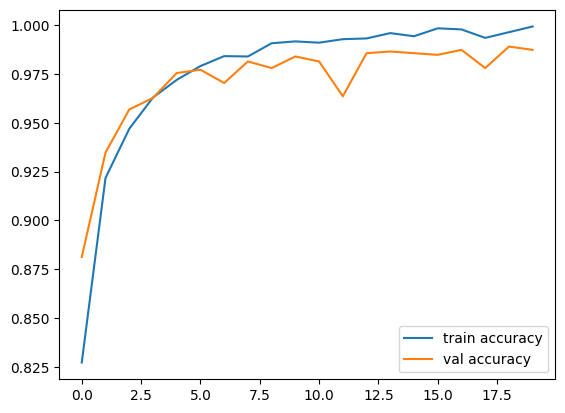

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


In [16]:
# Load CSV as strings first
new_df = pd.read_csv(r"data_sets\ecg_test.csv", header=None, dtype=str)

processed_signals = []
target_len = 120  # same length as used in training

for idx, row in new_df.iterrows():
    # Convert row to numeric, replace bad values with 0
    signal = pd.to_numeric(row, errors='coerce').fillna(0).values.flatten()
    
    # Pad or truncate to target length
    if len(signal) < target_len:
        signal = np.pad(signal, (0, target_len - len(signal)), mode='constant')
    elif len(signal) > target_len:
        signal = signal[:target_len]
    
    processed_signals.append(signal)

# Stack all signals for CNN input
new_X = np.stack(processed_signals)

# Normalize with the same scaler used in training
new_X = scaler.transform(new_X)

# Reshape for CNN (samples, signal_length, 1)
new_X = new_X[..., np.newaxis]

# Predict
predictions = model.predict(new_X)
predicted_labels = (predictions > 0.5).astype(int)

# Show predictions
for i, p in enumerate(predicted_labels):
    print(f"ECG {i+1}: {'Abnormal' if p[0] == 1 else 'Normal'}")

# Save the model
model.save("ecg_cnn_model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
ECG 1: Abnormal
ECG 2: Abnormal
ECG 3: Normal
ECG 4: Normal
ECG 5: Abnormal
